In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import datetime as dt

# Production

In [4]:
# Load file
production_df = pd.read_csv("Resources/gender_calc/producing_percent.csv")
production_df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.500000
1,8844,1995-12-15,0.000000
2,31357,1995-12-22,0.500000
3,11862,1995-02-10,1.000000
4,949,1995-12-15,0.200000
...,...,...,...
15761,45527,2010-01-01,0.222222
15762,14885,2005-09-13,0.000000
15763,390959,2000-10-22,0.500000
15764,222848,1995-01-01,0.000000


In [5]:
# convert release date to useful format
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

production_df['release_date'] = pd.to_datetime(production_df['release_date'])
production_df['release_date']=production_df['release_date'].map(dt.datetime.toordinal)

In [6]:
production_df.dtypes

movie_id            int64
release_date        int64
percent_female    float64
dtype: object

TRY BINNIN INSTEAD OF GROUP BY

In [7]:
prod_count_df = production_df.groupby(['release_date'])['percent_female'].sum()

In [8]:
prod_count_df


release_date
711858    0.0
711861    0.0
711870    0.0
711875    0.0
711876    0.0
         ... 
736694    0.0
736809    0.0
737005    0.0
737059    0.0
737775    0.0
Name: percent_female, Length: 8719, dtype: float64

DONT RERUN

In [9]:
# Change from series to df
production = prod_count_df.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
production = production.rename_axis('release_date').reset_index()

# Review df
production

,release_date,percent_female
0,711858,0.0
1,711861,0.0
2,711870,0.0
3,711875,0.0
4,711876,0.0
...,...,...
8714,736694,0.0
8715,736809,0.0
8716,737005,0.0
8717,737059,0.0


Review data distribution before applying ML model

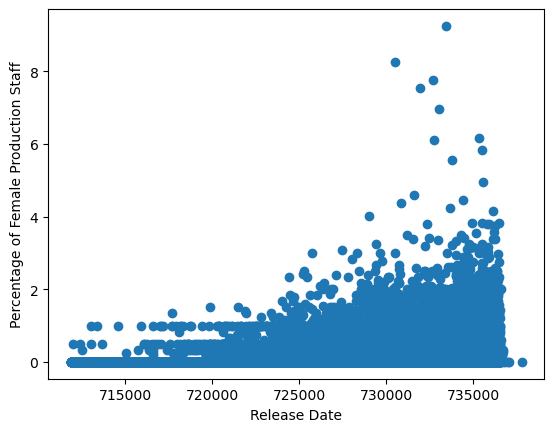

In [10]:
# Preview data
plt.scatter(production.release_date, production.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Production Staff')
plt.show()

In [11]:
#  x axis 
X = production.release_date.values.reshape(-1, 1)
X

array([[711858],
       [711861],
       [711870],
       ...,
       [737005],
       [737059],
       [737775]], dtype=int64)

In [12]:
y = production.percent_female
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8714    0.0
8715    0.0
8716    0.0
8717    0.0
8718    0.0
Name: percent_female, Length: 8719, dtype: float64

In [13]:
model_prod = LinearRegression()

In [14]:
model_prod.fit(X, y)

LinearRegression()

In [15]:
prod_y_pred = model_prod.predict(X)
print(prod_y_pred.shape)
print(len(prod_y_pred))

(8719,)
8719


Production Graph

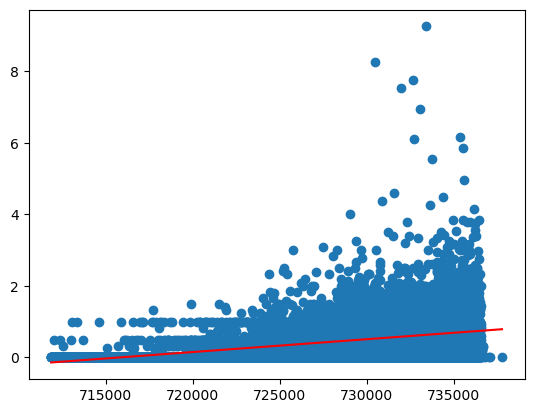

In [16]:
plt.scatter(X, y)
plt.plot(X, prod_y_pred, color='red')
plt.show()

Production linear regression equation

In [17]:
print(model_prod.coef_)
print(model_prod.intercept_)

[3.5859565e-05]
-25.667812652246926


# Writing


In [18]:
writing_df = pd.read_csv("Resources/gender_calc/writing_percent.csv")
writing_df

,movie_id,release_date,percent_female
0,5,1995-12-09,0.25
1,6,1993-10-15,0.00
2,11,1977-05-25,0.00
3,12,2003-05-30,0.00
4,13,1994-07-06,0.00
...,...,...,...
21680,463800,2017-06-28,0.00
21681,463906,2017-07-11,0.00
21682,464111,2017-07-12,0.50
21683,467731,1956-02-19,0.00


In [19]:
# Convert time
writing_df['release_date'] = pd.to_datetime(writing_df['release_date'])
writing_df['release_date']=writing_df['release_date'].map(dt.datetime.toordinal)

In [20]:
writing_df.dtypes

movie_id            int64
release_date        int64
percent_female    float64
dtype: object

In [21]:
writing_df = writing_df.groupby(['release_date'])['percent_female'].sum()

In [22]:
writing_df

release_date
711858    0.0
711861    0.0
711863    0.0
711869    0.0
711870    1.0
         ... 
736694    0.0
736754    0.0
737005    0.0
737059    0.0
737775    0.0
Name: percent_female, Length: 11014, dtype: float64

In [23]:
# Change from series to df
writing = writing_df.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
writing  = writing .rename_axis('release_date').reset_index()

# Review df
writing

,release_date,percent_female
0,711858,0.0
1,711861,0.0
2,711863,0.0
3,711869,0.0
4,711870,1.0
...,...,...
11009,736694,0.0
11010,736754,0.0
11011,737005,0.0
11012,737059,0.0


Review data distribution before applying ML model

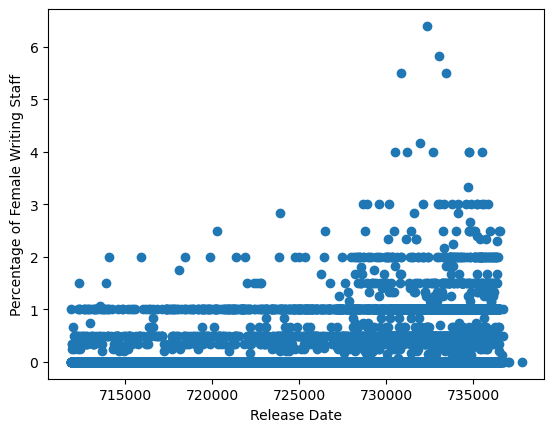

In [24]:
# Preview data
plt.scatter(writing.release_date, writing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Writing Staff')
plt.show()

In [25]:
# Reshape values
Xw = writing.release_date.values.reshape(-1, 1)
Xw

array([[711858],
       [711861],
       [711863],
       ...,
       [737005],
       [737059],
       [737775]], dtype=int64)

In [26]:
yw = writing.percent_female
yw

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
11009    0.0
11010    0.0
11011    0.0
11012    0.0
11013    0.0
Name: percent_female, Length: 11014, dtype: float64

In [27]:
model_writ = LinearRegression()

In [28]:
model_writ.fit(Xw, yw)

LinearRegression()

In [29]:
yw_pred = model_writ.predict(Xw)
print(yw_pred.shape)
print(len(yw_pred))

(11014,)
11014


Writing Graph

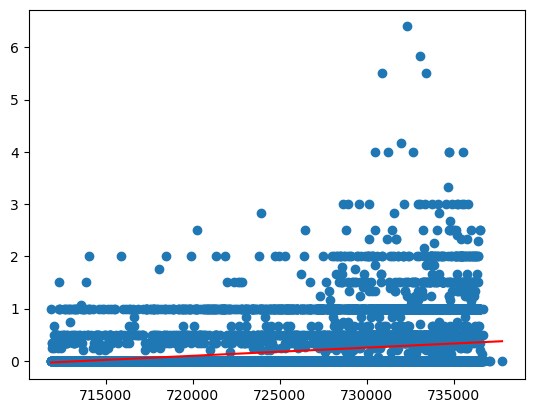

In [30]:
plt.scatter(Xw, yw)
plt.plot(Xw, yw_pred, color='red')
plt.show()

Writing linear regression equation

In [31]:
print(model_writ.coef_)
print(model_writ.intercept_)

[1.56975311e-05]
-11.20653926712821


# Directing

In [32]:
# Load file
directing_df = pd.read_csv("Resources/gender_calc/directing_percent.csv")
directing_df

,movie_id,release_date,percent_female
0,5,1995-12-09,0.2
1,6,1993-10-15,0.0
2,11,1977-05-25,0.0
3,12,2003-05-30,0.0
4,13,1994-07-06,0.0
...,...,...,...
25764,462788,1966-12-02,0.0
25765,463800,2017-06-28,0.0
25766,464111,2017-07-12,0.0
25767,467731,1956-02-19,0.0


In [33]:
# convert release date to useful format
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

directing_df['release_date'] = pd.to_datetime(directing_df['release_date'])
directing_df['release_date']=directing_df['release_date'].map(dt.datetime.toordinal)

In [34]:
directing_df.dtypes

movie_id            int64
release_date        int64
percent_female    float64
dtype: object

In [35]:
directing_count = directing_df.groupby(['release_date'])['percent_female'].sum()

In [36]:
directing_count 

release_date
711858    0.0
711861    0.0
711863    0.0
711869    0.0
711870    0.0
         ... 
736694    0.0
736754    0.0
737005    0.0
737059    0.0
737775    0.0
Name: percent_female, Length: 12059, dtype: float64

DONT RERUN

In [37]:
# Change from series to df
directing = directing_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
directing = directing.rename_axis('release_date').reset_index()

# Review df
directing

,release_date,percent_female
0,711858,0.0
1,711861,0.0
2,711863,0.0
3,711869,0.0
4,711870,0.0
...,...,...
12054,736694,0.0
12055,736754,0.0
12056,737005,0.0
12057,737059,0.0


Review data distribution before applying ML model

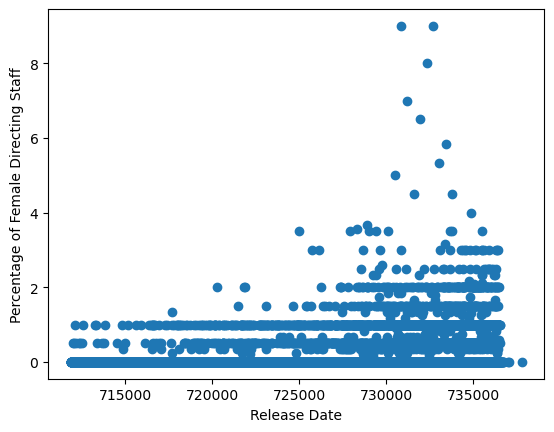

In [38]:
# Preview data
plt.scatter(directing.release_date, directing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [39]:
#  x axis 
Xd = directing.release_date.values.reshape(-1, 1)
Xd

array([[711858],
       [711861],
       [711863],
       ...,
       [737005],
       [737059],
       [737775]], dtype=int64)

In [40]:
yd = directing.percent_female
yd

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12054    0.0
12055    0.0
12056    0.0
12057    0.0
12058    0.0
Name: percent_female, Length: 12059, dtype: float64

In [41]:
model_dir = LinearRegression()

In [42]:
model_dir.fit(Xd, yd)

LinearRegression()

In [43]:
yd_pred = model_dir.predict(Xd)
print(yd_pred.shape)
print(len(yd_pred))

(12059,)
12059


Direction Graph

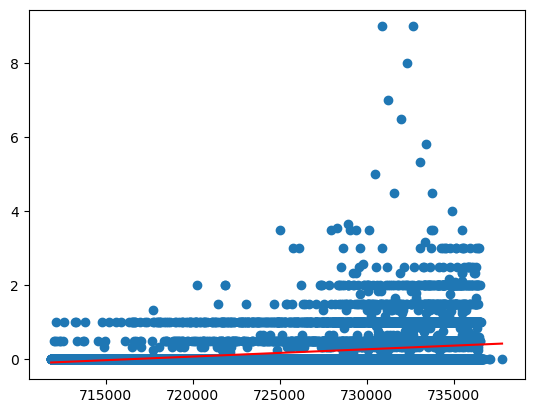

In [44]:
plt.scatter(Xd, yd)
plt.plot(Xd, yd_pred, color='red')
plt.show()

Direction linear regression equation

In [45]:
print(model_dir.coef_)
print(model_dir.intercept_)

[1.9713468e-05]
-14.123366561302559
